# Devnagari Character Classification using Devnagari Character Dataset: An Unsupervised Learning and Neural Network Approach

In [1]:
%%capture

# Before starting of the program below code ensures that you have all the necessary libraries installed 
# if not, it installs them.

!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install opendatasets
!pip install kaggle
!pip install tensorflow

In [2]:
# Importing all the required libraries
import sys
import time
import math
import numpy as np
import pandas as pd
from pathlib import Path
import sklearn
import pickle
import seaborn as sns
import matplotlib as mpl
from pathlib import Path
import opendatasets as od
import tensorflow as tf

In [3]:
# Declaring image properties
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
# importing warnings package and filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# setting random seed for entire program
np.random.seed(22)

In [6]:
# here you will declare the names of training and testing data
# if not present provide a kaggle url for downloading the URL 
# and also providing the necessary directory to put these files in.

data_file_names = ["data.csv"]
kaggle_data_url = "https://www.kaggle.com/datasets/rishianand/devanagari-character-set"

datapath = Path() / "devanagari-character-set"
datapath.mkdir(parents=True, exist_ok=True)

In [7]:
file_present = True
for filename in data_file_names:
    if not (datapath / filename).is_file():
        file_present = False

# below code requires Kaggle Credentials, so follow the following steps to get them
# opendatasets uses the Kaggle Official API for donwloading dataset from Kaggle. 
# Follow these steps to find your API credentials:
# Step 1: Go to https://kaggle.com/me/account (sign in if required).
# Step 2: Scroll down to the "API" section and click "Create New API Token". 
#         This will download a file kaggle.json with the following contents:
# {"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}
# Step 3: When you run opendatsets.download, you will be asked to enter your username & Kaggle API, 
# which you can get from the file downloaded in step 2.
if not file_present:
    od.download(kaggle_data_url)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [9]:
# Reading the data
data_ = pd.read_csv(datapath/'data.csv')

In [10]:
np.unique(data_['character'])[:5]

array(['character_01_ka', 'character_02_kha', 'character_03_ga',
       'character_04_gha', 'character_05_kna'], dtype=object)

Note : In this perticular dataset, there are about 45 different classes. This makes the dataset very huge and computationally intensive. After talking with professor, he suggested to use reduced dataset for the scope of second question. Thus, I have selected first 5 classes present in the data and filtered the main dataset accordingly.
Also, at various locations I was getting index not found error for the dataframes. So, after reading the dataframe documentation, I am resetting the indexes after each split.|

In [11]:
data_ = data_.loc[data_['character'].isin(np.unique(data_['character'])[:5])]

In [12]:
data_labels = data_['character']
labels_ = data_labels

In [13]:
data_.shape, labels_.shape

((10000, 1025), (10000,))

In [14]:
data_.drop(columns=['character'], axis = 1, inplace = True)

In [15]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
labels_ = pd.DataFrame(le.fit_transform(labels_))
labels_2 = labels_

In [16]:
np.unique(labels_)

array([0, 1, 2, 3, 4])

In [17]:
# Split the dataset into training and validation data sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=22)

training_index, test_index = next(split.split(data_, labels_))
data = data_.loc[training_index].reset_index()
labels = labels_.loc[training_index].reset_index()

test_data = data_.loc[test_index].reset_index()
test_labels = labels_.loc[test_index].reset_index()

In [18]:
%%capture
# This will reset all of the indexes after the stratified shuffle split which some times gives not a index error
data.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)

test_data.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)

data.drop(columns=['index'], axis = 1, inplace = True)
labels.drop(columns=['index'], axis = 1, inplace = True)

test_data.drop(columns=['index'], axis = 1, inplace = True)
test_labels.drop(columns=['index'], axis = 1, inplace = True)

In [19]:
train_data = data
train_labels = labels

In [20]:
data.shape, test_data.shape, labels.shape, test_labels.shape

((8000, 1024), (2000, 1024), (8000, 1), (2000, 1))

In [21]:
# Split the dataset into training and validation data sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=22)

training_index, val_index = next(split.split(data, labels))

training_data = data.loc[training_index]
training_labels = labels.loc[training_index]

validation_data = data.loc[val_index]
validation_labels = labels.loc[val_index]

In [22]:
training_data.shape, training_labels.shape , validation_data.shape, validation_labels.shape

((6000, 1024), (6000, 1), (2000, 1024), (2000, 1))

In [23]:
test_data.shape, test_labels.shape

((2000, 1024), (2000, 1))

In [24]:
%%capture
# This will reset all of the indexes after the stratified shuffle split which some times gives not a index error
training_data.reset_index(drop=True, inplace=True)
training_labels.reset_index(drop=True, inplace=True)

validation_data.reset_index(drop=True, inplace=True)
validation_labels.reset_index(drop=True, inplace=True)

# training_data.drop(columns=['index'], axis = 1, inplace = True)
# training_labels.drop(columns=['index'], axis = 1, inplace = True)

# validation_data.drop(columns=['index'], axis = 1, inplace = True)
# validation_labels.drop(columns=['index'], axis = 1, inplace = True)

#### Question : Apply PCA to the training portion of the dataset. How many components do you need to preserve 95% of the variance?

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=0.95)
pca.fit(training_data)

PCA(n_components=0.95)

In [27]:
# Transform training and testing data using PCA
pca_training_data = pd.DataFrame(pca.transform(training_data))
pca_validation_data = pd.DataFrame(pca.transform(validation_data))

In [28]:
pca_training_data.shape, training_labels.shape , pca_validation_data.shape, validation_labels.shape

((6000, 170), (6000, 1), (2000, 170), (2000, 1))

#### Answer : 
After implementing PCA to the training data, we need to keep 170 components in order to preserve 95% of varience.

#### Question : Train a Random Forest classifier on the reduced dataset. Was training much faster than in Homework 2? Evaluate the classifier on the test set. How does it compare to the classifier from Homework 2?

### Implementing classifier from Homework 2 again

### 1. Random Forest Classifier (without PCA)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [30]:
estimators = np.arange(50, 1024, 50)
depths = np.arange(5, 55, 5)
l_e, l_d = estimators.size, depths.size

In [31]:
parameters = {
    "training_accuracy" : np.zeros((l_e, l_d)),
    "validation_accuracy" : np.zeros((l_e, l_d)),
    "training_precision" : np.zeros((l_e, l_d)),
    "validation_precision" : np.zeros((l_e, l_d)),
    "training_recall" : np.zeros((l_e, l_d)),
    "validation_recall" : np.zeros((l_e, l_d)),
    "training_f1_score" : np.zeros((l_e, l_d)),
    "validation_f1_score" : np.zeros((l_e, l_d)),
    "best_accuracy" : -math.inf,
    "best_parameters" : {'n_estimators': -1, 'max_depth': -1},
}

In [32]:
def calculate_metrics(pred_tlabels, training_labels, pred_vlabels,
                      validation_labels, row, column, estimator, depth, parameters):
    # calculating scores on training dataset
    training_precision = precision_score(training_labels, pred_tlabels, average='weighted')
    training_accuracy = accuracy_score(training_labels, pred_tlabels)
    training_recall = recall_score(training_labels, pred_tlabels, average='weighted')
    training_f1_score = f1_score(training_labels, pred_tlabels, average='weighted')

    # calculating scores on validation dataset
    validation_precision = precision_score(validation_labels, pred_vlabels, average='weighted')
    validation_accuracy = accuracy_score(validation_labels, pred_vlabels)
    validation_recall = recall_score(validation_labels, pred_vlabels, average='weighted')
    validation_f1_score = f1_score(validation_labels, pred_vlabels, average='weighted')

    parameters["training_accuracy"][row][column] = training_accuracy
    parameters["validation_accuracy"][row][column] = validation_accuracy
    parameters["training_precision"][row][column] = training_precision
    parameters["validation_precision"][row][column] = validation_precision
    parameters["training_recall"][row][column] = training_recall
    parameters["validation_recall"][row][column] = validation_recall
    parameters["training_f1_score"][row][column] = training_f1_score
    parameters["validation_f1_score"][row][column] = validation_f1_score

    # Keep track of best hyperparameters and corresponding validation accuracy
    if validation_accuracy > parameters["best_accuracy"]:
        parameters["best_accuracy"] = validation_accuracy
        parameters["best_parameters"] = {'n_estimators': estimator, 'max_depth': depth}
    return parameters

In [33]:
def save_dict(file_name, dictonary ):
    with open(file_name, 'wb') as fp:
        pickle.dump(dictonary, fp)

def load_dict(file_name):
    with open(file_name, 'rb') as fp:
        dictonary = pickle.load(fp)
    return dictonary

In [34]:
%%time
file_name = "hq2_random_forest_without_pca.pkl"
if Path(file_name).is_file():
    parameters = load_dict(file_name)
else:
    for index_i, estimator in enumerate(estimators):
        print(index_i , end = "")
        for index_j, depth in enumerate(depths):    
            # Declaring a model
            rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth, n_jobs= -1)

            # Fit model on training data
            rfc.fit(training_data, training_labels)

            # Predicting training labels based on trainig data
            pred_tlabels = rfc.predict(training_data)

            # Predicting validation labels based on validation data
            pred_vlabels = rfc.predict(validation_data)

            parameters = calculate_metrics(pred_tlabels, training_labels, pred_vlabels, 
                                           validation_labels, index_i, index_j, estimator, depth, parameters)
    save_dict(file_name, parameters)

012345678910111213141516171819CPU times: total: 1h 19min 10s
Wall time: 10min 58s


In [35]:
print("Best accuracy obtained : ", parameters['best_accuracy'])
print("Optimum value of estimators obtained : ", parameters['best_parameters']['n_estimators'])
print("Optimum value of depth obtained : ", parameters['best_parameters']['max_depth'])

Best accuracy obtained :  0.9705
Optimum value of estimators obtained :  650
Optimum value of depth obtained :  25


In [36]:
# Creating model with best hyperparameters for executing it on test data
rfc_model = RandomForestClassifier(n_estimators=parameters['best_parameters']['n_estimators'], max_depth=parameters['best_parameters']['max_depth'], n_jobs= -1)

In [37]:
%%time
# save the model after calling .fit method or retriving already saved model
filename = 'hq2_rfc_model.sav'

if Path(filename).is_file():
    rfc_model = pickle.load(open(filename, 'rb'))
else:
    rfc_model.fit(training_data, training_labels)
    pickle.dump(rfc_model, open(filename, 'wb'))

CPU times: total: 33.5 s
Wall time: 4.89 s


In [38]:
# Predicting test data labels based on trained model
test_labels_pred = rfc_model.predict(test_data)

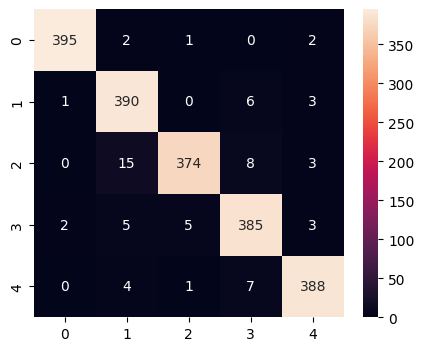

In [39]:
# plotting confusion matrix
plt.figure(figsize=(5,4))
plt.rc('font', size=10)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [40]:
def print_test_metrics(test_labels, test_labels_pred):
    print(f"Precision Score :  {precision_score(test_labels, test_labels_pred, average='weighted') :.4f} ")
    print(f"Accuracy Score \t:  {accuracy_score(test_labels, test_labels_pred) :.4f} ")
    print(f"Recall Score \t:  {recall_score(test_labels, test_labels_pred, average='weighted') :.4f} ")
    print(f"F1 Score \t:  {f1_score(test_labels, test_labels_pred, average='weighted') :.4f} ")

In [41]:
print_test_metrics(test_labels, test_labels_pred)

Precision Score :  0.9665 
Accuracy Score 	:  0.9660 
Recall Score 	:  0.9660 
F1 Score 	:  0.9660 


### 2. Random Forest Classifier (with PCA)

In [42]:
estimators = np.arange(50, 171, 20)
depths = np.arange(5, 55, 5)
l_e, l_d = estimators.size, depths.size

In [43]:
parameters_pca = {
    "training_accuracy" : np.zeros((l_e, l_d)),
    "validation_accuracy" : np.zeros((l_e, l_d)),
    "training_precision" : np.zeros((l_e, l_d)),
    "validation_precision" : np.zeros((l_e, l_d)),
    "training_recall" : np.zeros((l_e, l_d)),
    "validation_recall" : np.zeros((l_e, l_d)),
    "training_f1_score" : np.zeros((l_e, l_d)),
    "validation_f1_score" : np.zeros((l_e, l_d)),
    "best_accuracy" : -math.inf,
    "best_parameters" : {'n_estimators': -1, 'max_depth': -1}
}

In [44]:
%%time
file_name = "hq2_random_forest_with_pca.pkl"
if Path(file_name).is_file():
    parameters_pca = load_dict(file_name)
else:
    for index_i, estimator in enumerate(estimators):
        print(index_i , end = " ")
        for index_j, depth in enumerate(depths):    
            # Declaring a model
            rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth, n_jobs= -1)

            # Fit model on training data
            rfc.fit(pca_training_data, training_labels)

            # Predicting training labels based on trainig data
            pred_tlabels = rfc.predict(pca_training_data)

            # Predicting validation labels based on validation data
            pred_vlabels = rfc.predict(pca_validation_data)

            parameters_pca = calculate_metrics(pred_tlabels, training_labels, pred_vlabels, 
                                           validation_labels, index_i, index_j, estimator, depth, parameters_pca)
    save_dict(file_name, parameters_pca)

0 1 2 3 4 5 6 CPU times: total: 11min 21s
Wall time: 1min 15s


In [45]:
print("Best accuracy obtained : ", parameters_pca['best_accuracy'])
print("Optimum value of estimators obtained : ", parameters_pca['best_parameters']['n_estimators'])
print("Optimum value of depth obtained : ", parameters_pca['best_parameters']['max_depth'])

Best accuracy obtained :  0.948
Optimum value of estimators obtained :  170
Optimum value of depth obtained :  35


In [46]:
# Creating model with best hyperparameters for executing it on test data
rfc_model_pca = RandomForestClassifier(n_estimators=parameters_pca['best_parameters']['n_estimators'], max_depth=parameters_pca['best_parameters']['max_depth'], n_jobs= -1)

In [47]:
%%time
# save the model after calling .fit method or retriving already saved model
filename = 'hq2_rfc_model_pca.sav'

if Path(filename).is_file():
    rfc_model_pca = pickle.load(open(filename, 'rb'))
else:
    rfc_model_pca.fit(pca_training_data, training_labels)
    pickle.dump(rfc_model_pca, open(filename, 'wb'))

CPU times: total: 15.8 s
Wall time: 1.5 s


In [48]:
# Predicting test data labels based on trained model
pca_test_data = pd.DataFrame(pca.transform(test_data))
test_labels_pred = rfc_model_pca.predict(pca_test_data)

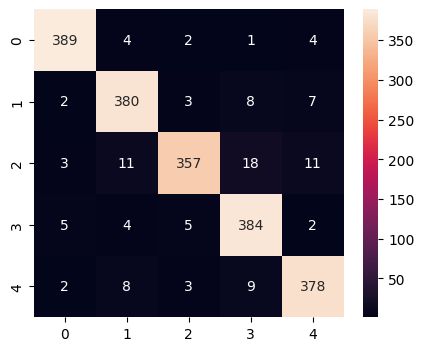

In [49]:
# plotting confusion matrix
plt.figure(figsize=(5,4))
plt.rc('font', size=10)  
cm = confusion_matrix(test_labels, test_labels_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [50]:
print_test_metrics(test_labels, test_labels_pred)

Precision Score :  0.9446 
Accuracy Score 	:  0.9440 
Recall Score 	:  0.9440 
F1 Score 	:  0.9439 


It appears that for same number of trees and with same depth, the random forest with PCA takes relatively less time then the random forest without PCA. This is because the dimentionality is reduced and thus the complexity in the data is also reduced.

If we look at the accuracy produced by both models, there is no huge gap in between. So, reducing dimentionality to save time makes sense here.

#### Question: Plot 10 random images in the original form (without PCA) and then plot them after you kept 95% of variance using PCA.

In [51]:
# function to plot digits into an image format
def plot_data(image_data):
    image = image_data.reshape(32, 32)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

##### Random 10 samples from Training data before implementing PCA

In [52]:
random_sample_indexes = training_data.sample(n=10, random_state=22).index

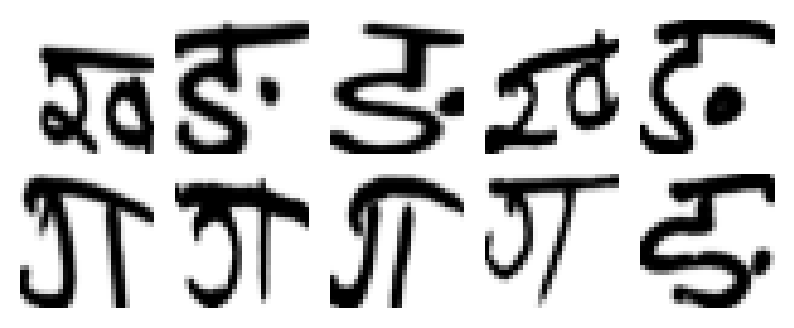

In [53]:
plt.figure(figsize=(10, 4))
for index_i, image_index in enumerate(random_sample_indexes):
    plt.subplot(2, 5, index_i + 1)
    plot_data(training_data.loc[image_index].to_numpy())
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

##### Random 10 samples from Training data After implementing PCA

In [54]:
training_data_recovered = pd.DataFrame(pca.inverse_transform(pca_training_data))

In [55]:
random_sample_indexes = training_data_recovered.sample(n=10, random_state=22).index

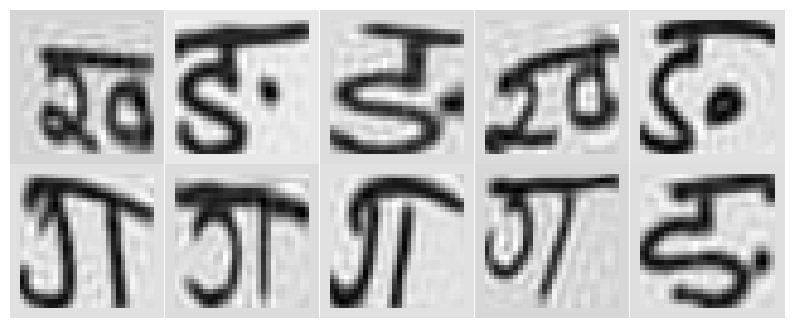

In [56]:
plt.figure(figsize=(10, 4))
for index_i, image_index in enumerate(random_sample_indexes):
    plt.subplot(2, 5, index_i + 1)
    plot_data(training_data_recovered.loc[image_index].to_numpy())
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

#### Question: How much of the variance is explained with the first two principal components? 

In [57]:
    print(f"The first component explains {pca.explained_variance_ratio_[0] * 100:.4f} % variance")

The first component explains 8.0120 % variance


In [58]:
print(f"The Second component explains {pca.explained_variance_ratio_[1] * 100:.4f} % variance")

The Second component explains 5.9257 % variance


### Question:
#### Use PCA to reduce dimensionality to only 2 dimensions. Plot 1000 random images from the training set in the 2D space spanned by the first two principal components. Use a scatterplot with 10 different colors to represent each image’s target class. Repeat the process and create the same type of plots for t-SNE, LLE and MDS. [6 points] Which of the visualizations do you prefer and why? [1 point]


In [59]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(32, 32)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

In [60]:
# Plot the first two principal components
def plot_principal_components(data, labels, figsize=(13, 10)):
    plt.figure(figsize=(13,10))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="jet")
    plt.axis('off')
    plt.colorbar()
    plt.show()

### 1. PCA

In [61]:
# Extracting 10000 samples of the trainig data
# Split the dataset into training and validation data sets
random_sample = train_data.sample(n = 1000, random_state = 22)
random_labels = train_labels.sample(n = 1000, random_state = 22)

In [62]:
X = random_sample
y = random_labels
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [63]:
pca = PCA(n_components=2, random_state=22)

In [64]:
X_pca_reduced = pca.fit_transform(X)

In [65]:
X_pca_reduced.shape, y.shape

((1000, 2), (1000, 1))

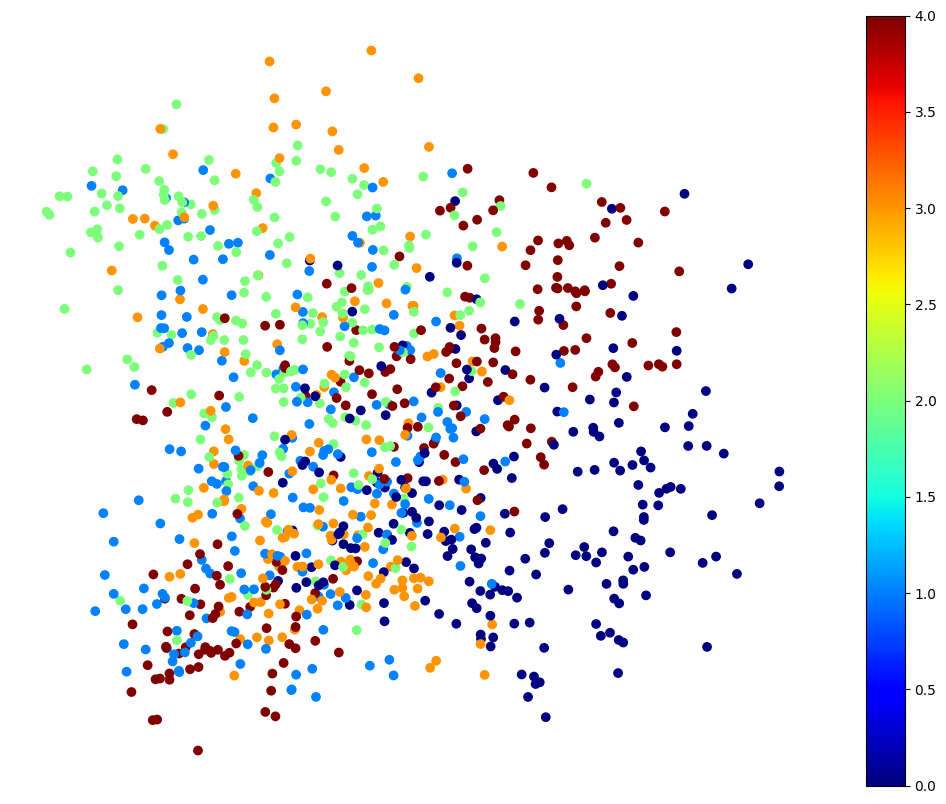

In [66]:
plot_principal_components(X_pca_reduced, y)

### 2. TSNE

In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=22)

In [68]:
X_tsne_reduced = tsne.fit_transform(X)

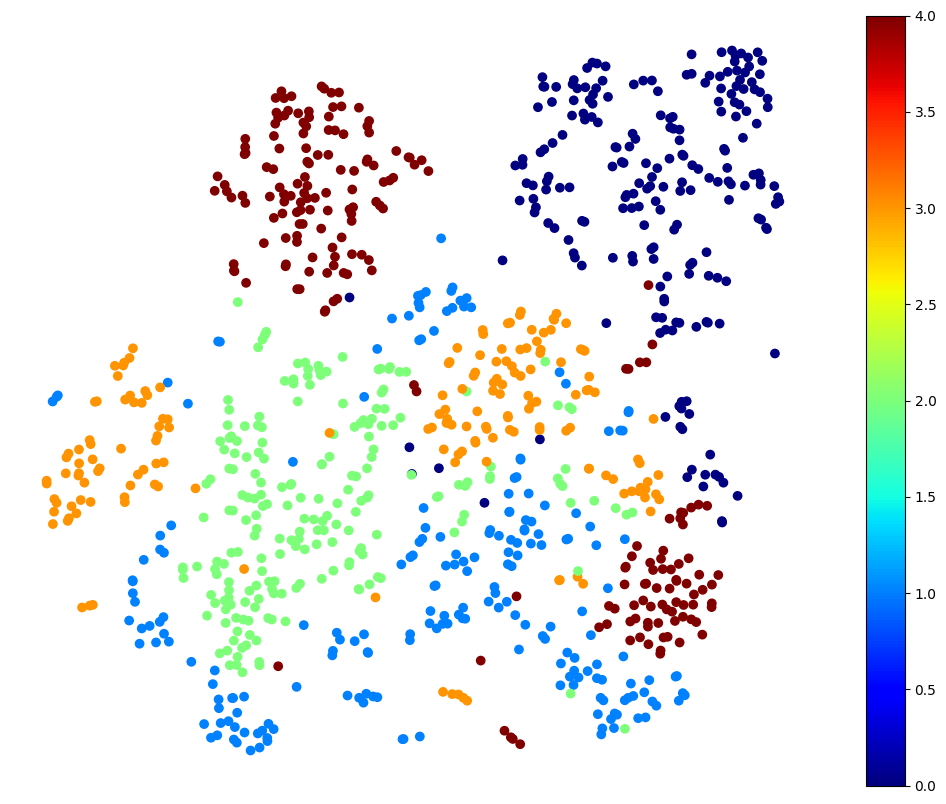

In [69]:
plot_principal_components(X_tsne_reduced, y)

### 3. LLE

In [70]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5, random_state=22)

In [71]:
X_lle_reduced = lle.fit_transform(X)

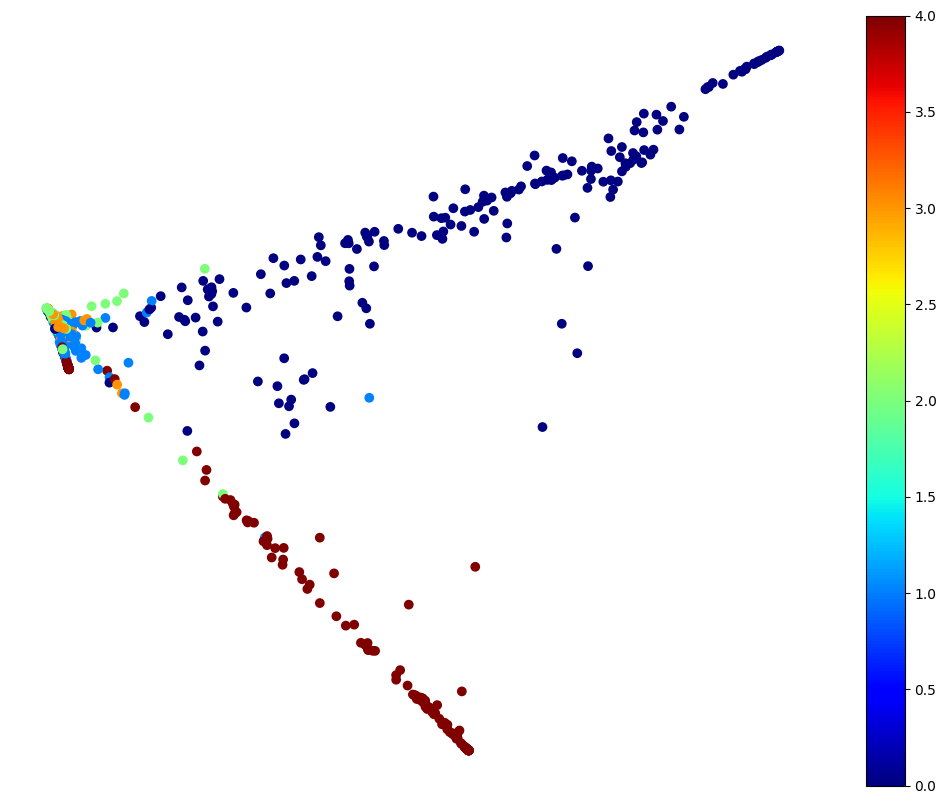

In [72]:
plot_principal_components(X_lle_reduced, y)

### 4. MDS

In [73]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=22)

In [74]:
X_mds_reduced = mds.fit_transform(X)

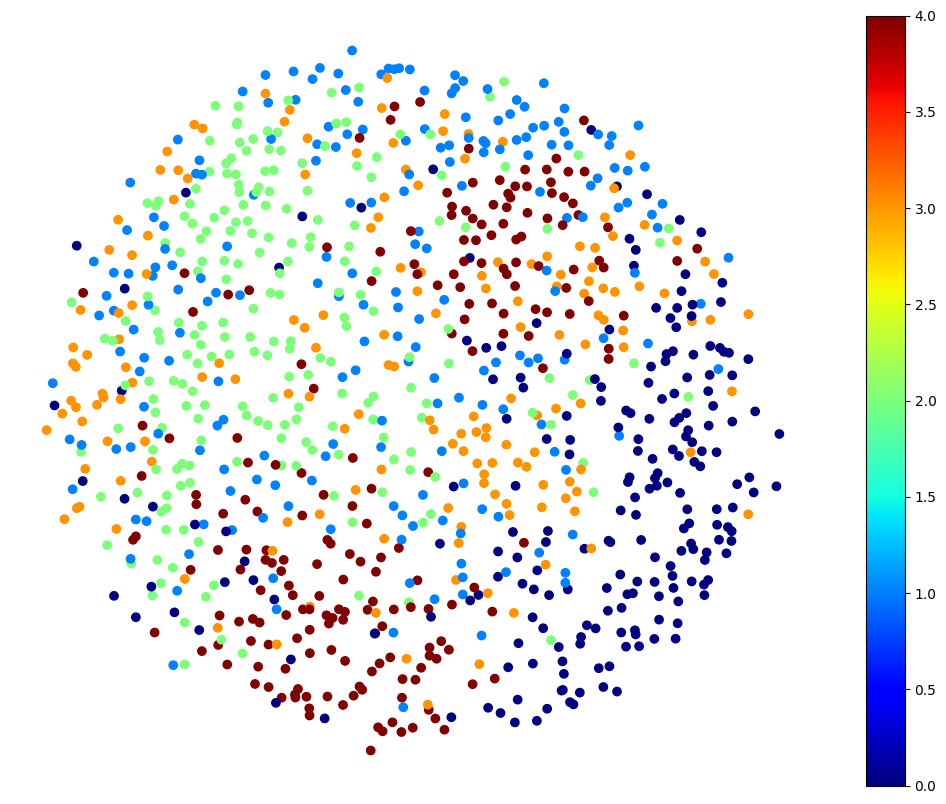

In [75]:
plot_principal_components(X_mds_reduced, y)

#### Answer: 
PCA, t-SNE, LLE and MDS are different dimentionality reduction techniques. We have visualized output of each method. 
Every visualization tries to show different clustering patterns between the data. For this example, we would generally prefer the visualization given by TSNE. 
The scatterplot plotted using TSNE forms a neat clusters and depicts visually separable data.

# ===============================================

### Question:
#### Take 10000 samples of the training portion of fashion MNIST dataset and cluster the images using K-Means. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset. Ensure that you have a good number of clusters using one of the techniques we discussed in class. [4 points] Visualize the clusters (you can show only a subset of images): do you see similar clothing items in each cluster?

In [76]:
# Extracting 10000 samples of the trainig data
# Split the dataset into training and validation data sets
random_sample = training_data.sample(n = 1000, random_state = 22)
random_labels = training_labels.sample(n = 1000, random_state = 22)

In [77]:
X_train = random_sample
y_train = random_labels

In [78]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)

First of all, we will run K-Means algorithm for different size of clusters. We can use silhouette score and inertia as one of the metrics to determine the optimum cluster size.

As suggested in problem statement, we will directly use the reduced data given by PCA insted of using the full dimention data.

In [79]:
%%time
from sklearn.cluster import KMeans

cluster_size_range = np.arange(2,10)

kmeans_per_k = []
for k in cluster_size_range:
    kmeans_obj = KMeans(n_clusters=k, random_state=42, init="random", n_init=10)
    kmeans_obj.fit(X_train_pca)
    kmeans_per_k.append(kmeans_obj)

CPU times: total: 938 ms
Wall time: 664 ms


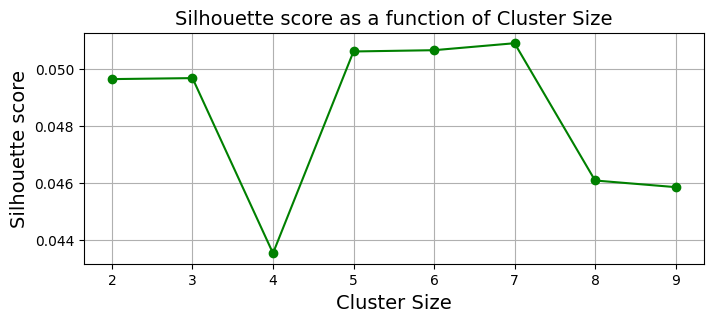

In [80]:
# plotting the silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(8, 3))
plt.plot(cluster_size_range, silhouette_scores, "go-")
plt.title("Silhouette score as a function of Cluster Size")
plt.xlabel("Cluster Size")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

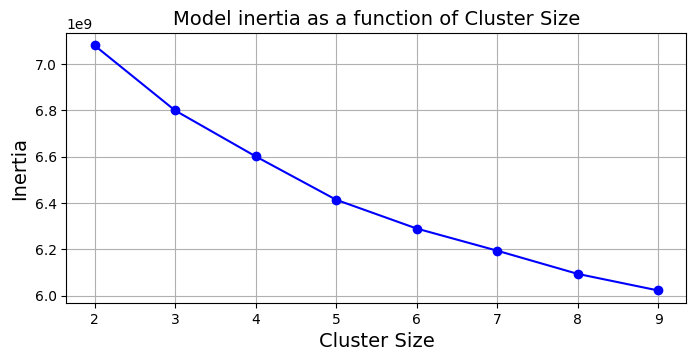

In [81]:
# plotting the intertia
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(cluster_size_range, inertias, "bo-")
# plt.plot(10, inertias[1], "rs")
plt.title("Model inertia as a function of Cluster Size")
plt.xlabel("Cluster Size")
plt.ylabel("Inertia")
plt.grid()
plt.show()

####  By looking at the model inertia, the elbow is clearly visible at the cluster size 5

In [82]:
cluster_size_range[3]

5

In [83]:
best_model = kmeans_per_k[3]

For convinience we have plotted first 20 images per cluster.

In [84]:
def plot_items(items, indexes):
    plt.figure(figsize=(10, 4))
    for index_i, image_index in enumerate(indexes):
        plt.subplot(2, 5, index_i + 1)
        plot_data(training_data.loc[image_index].to_numpy())
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

Cluster 0


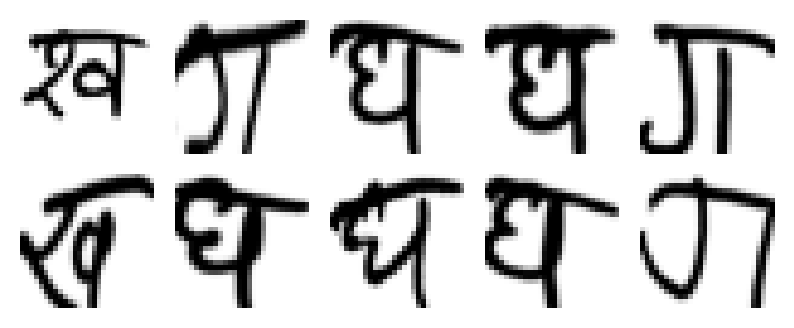

Cluster 1


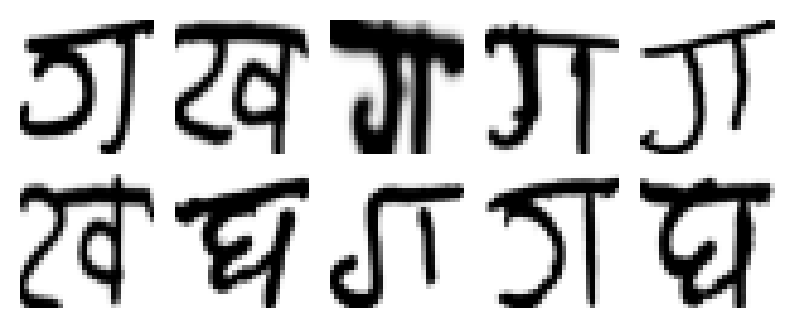

Cluster 2


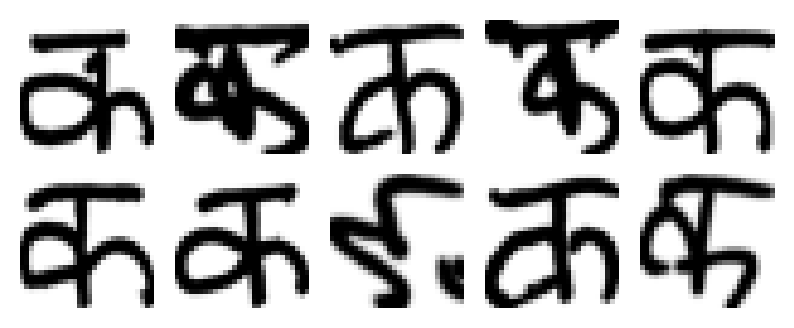

Cluster 3


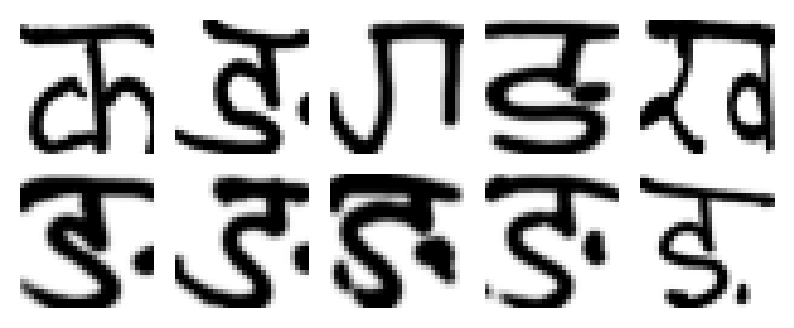

Cluster 4


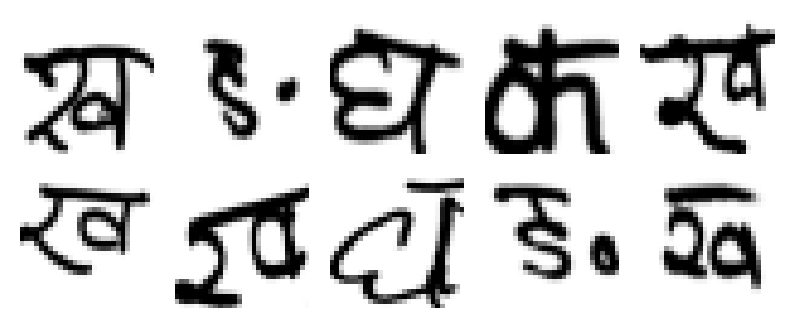

In [85]:
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    items = X_train[in_cluster]
    labels = y_train[in_cluster]

    image_index = items.sample(n=10, random_state=22).index
    
    plot_items(items, image_index)

#### Answer:

There are certain clusters like cluster 2 which contains most of the similar character types. Also, if we take the generality into consideration, the K-means clustering has managed to cluster the characters with similar patterns together. But there are some clusters(cluster 3, cluster 4, which has incorrectly classified the data.

# ====================================================

### Question: 

#### Take 10000 samples of the training portion of fashion MNIST dataset and cluster the images using a Gaussian mixture model. To speed up the algorithm, use PCA to reduce the dimensionality of the dataset. Ensure that you have a good number of clusters using one of the techniques we discussed in the class.

In [86]:
from sklearn.mixture import GaussianMixture

In [87]:
%%time
cluster_size_range = np.arange(2,10)

gms_per_k = []
for k in cluster_size_range:
    gmm_model = GaussianMixture(n_components=k, n_init=10, random_state=42)
    gmm_model.fit(X_train_pca)
    gms_per_k.append(gmm_model)

CPU times: total: 1min 23s
Wall time: 6.97 s


In [88]:
BICS = [model.bic(X_train_pca) for model in gms_per_k]
AICS = [model.aic(X_train_pca) for model in gms_per_k]

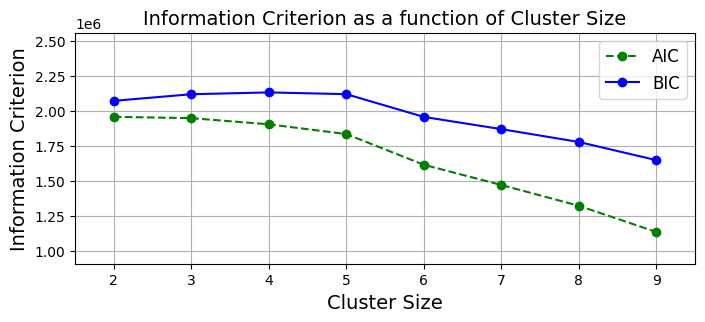

In [89]:
plt.figure(figsize=(8, 3))
plt.plot(cluster_size_range, AICS, "go--", label="AIC")
plt.plot(cluster_size_range, BICS, "bo-", label="BIC")
plt.title("Information Criterion as a function of Cluster Size")
plt.xlabel("Cluster Size")
plt.ylabel("Information Criterion")
plt.axis([min(cluster_size_range)-0.5, max(cluster_size_range)+0.5, 0.8*min(AICS), 1.2*max(BICS)])

plt.legend()
plt.grid()
plt.show()

If we look at the above figure, After cluster size = 5 BIC and AIC score decreases with each other. If we have to find the optimum Cluster size, then it will be 5. Thus, we will select the number of clusters as 5.

In [90]:
best_gmm_model = gms_per_k[3]

In [91]:
best_gmm_model.n_components

5

For convinience we have plotted first 20 images per cluster.

Cluster 0


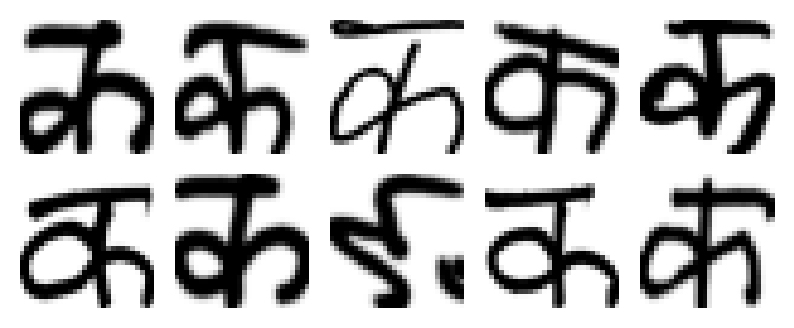

Cluster 1


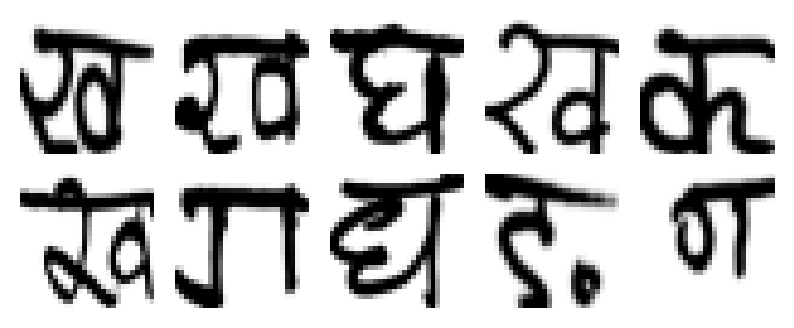

Cluster 2


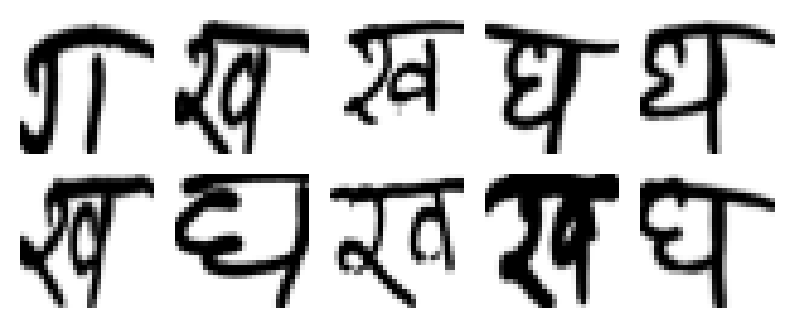

Cluster 3


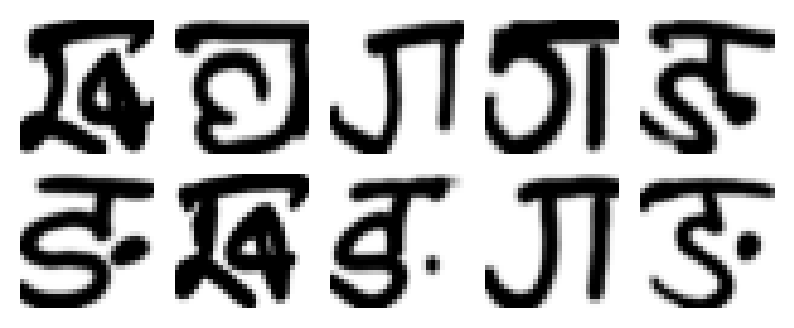

Cluster 4


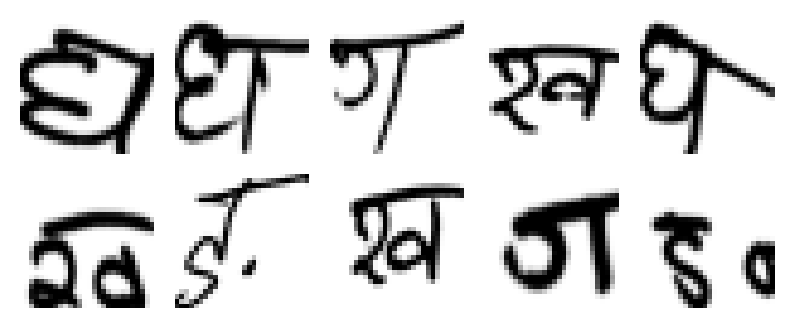

In [92]:
for cluster_id in range(best_gmm_model.n_components):
    print("Cluster", cluster_id)
    in_cluster = best_gmm_model.predict(X_train_pca) == cluster_id
    items = X_train[in_cluster]
    labels = y_train[in_cluster]
    image_index = items.sample(n=10, random_state=42).index
    
    plot_items(items, image_index)

#### Question: Do you see similar clothing items in each cluster?

There are certain clusters like cluster 0 and cluster 3 which contains most of the similar clothing types. Also, if we take the generality into consideration, the K-means clustering has managed to cluster the items with similar clothing type together. However, the heels, sandles and shooes are footware and the algorithm has managed to cluster those together. But there are some clusters(cluster 0, cluster 1, cluster 4), which has incorrectly classified the data.

### Question: 

Use the model to generate 20 new clothing items (using the sample() method), and visualize them (since you used PCA, you will need to use its inverse_transform() method).

In [93]:
gmm_model = GaussianMixture(n_components=best_gmm_model.n_components, n_init=10, random_state=22)

In [94]:
y_pred = gmm_model.fit_predict(X_train_pca)

In [95]:
n_items = 20
gen_items_reduced, y_gen_items = gmm_model.sample(n_samples=n_items)
gen_items = pca.inverse_transform(gen_items_reduced)

In [96]:
def plot_gmm_items(items, labels, n_cols=5):
    n_rows = (len(items) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (item, label) in enumerate(zip(items, labels)):
        item = item.reshape(32,32)
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(item, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

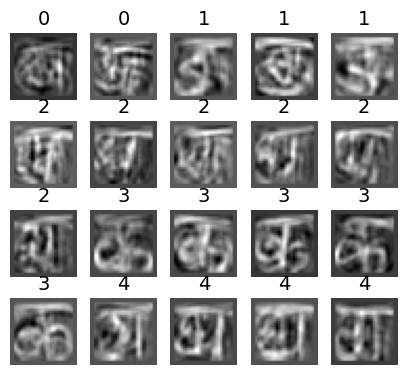

In [97]:
plot_gmm_items(gen_items, y_gen_items)

# ==================================================

### Question : 

Build a fully connected (dense) feedforward neural network with two hidden layers using Keras (within Tensorflow) and train it on 50k Fashion MNIST training images. First hidden layer should contain 200 neurons and second hidden layer should contain 50 neurons. The hidden layers should have ReLU activation function. Train the network for 100 epochs. Plot training and validation loss and accuracy as a function of training epochs. Try three different learning rates of your choice (make the plots for each learning rate). [8 points] 

In [98]:
# Split the dataset into training and validation data sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=22)

training_index, val_index = next(split.split(train_data, train_labels))

training_data = train_data.loc[training_index]
training_labels = train_labels.loc[training_index]

validation_data = train_data.loc[val_index]
validation_labels = train_labels.loc[val_index]

In [99]:
%%capture
# This will reset all of the indexes after the stratified shuffle split which some times gives not a index error
training_data.reset_index(drop=True, inplace=True)
training_labels.reset_index(drop=True, inplace=True)

validation_data.reset_index(drop=True, inplace=True)
validation_labels.reset_index(drop=True, inplace=True)

In [100]:
X_train = training_data
y_train = training_labels

X_valid = validation_data
y_valid = validation_labels

X_test = test_data
y_test = test_labels

In [101]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(6000, 1024) (6000, 1)
(2000, 1024) (2000, 1)
(2000, 1024) (2000, 1)


In [102]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [103]:
pca.n_components_

170

In [104]:
def train_neural_net(model_name, X_train, y_train, X_valid, y_valid, learning_rate, activation_functions):
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    if Path(model_name).is_dir():
        model = tf.keras.models.load_model(model_name)
        history=np.load(model_name+'\\trainHistory.npy',allow_pickle='TRUE').item()
    else:
        norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
        model = tf.keras.Sequential([
        norm_layer,
        tf.keras.layers.Dense(500, activation=activation_functions["hidden_layer1"]),
        tf.keras.layers.Dense(200, activation=activation_functions["hidden_layer2"]),
        tf.keras.layers.Dense(50, activation=activation_functions["hidden_layer3"]),
        tf.keras.layers.Dense(20, activation=activation_functions["hidden_layer4"]),
        tf.keras.layers.Dense(5, activation=activation_functions["ouput_layer"])
        ])
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        model.compile(loss=tf.keras.metrics.sparse_categorical_crossentropy, optimizer=optimizer, metrics=[tf.keras.metrics.sparse_categorical_accuracy ])
        norm_layer.adapt(X_train)
        history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
        model.save(model_name, save_format="tf")    
        np.save(model_name+'\\trainHistory.npy',history)
    return model, history

In [105]:
def plot_metrics(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [106]:
def print_test_metrics(model, X_test, y_test, learning_rate):
    loss_test, accuracy_test = model.evaluate(X_test, y_test)
    print("\nFor learning Rate : ", learning_rate)
    print("\t Reported Loss on Test set : ", round(loss_test, 4))
    print("\t Reported accuracy on Test set : ", round(accuracy_test, 4))

# Using Learning rate as 0.001 i.e. 1e-3

In [107]:
activation_functions = {'hidden_layer1': 'relu', 
                        'hidden_layer2': 'relu',
                        'hidden_layer3': 'relu', 
                        'hidden_layer4': 'relu',
                        'ouput_layer': 'softmax'}

In [108]:
%%capture
learning_rate = 1e-3
model, history = train_neural_net("hq2_neural_net_LR1e-03", X_train, y_train, X_valid, y_valid, learning_rate, activation_functions)

INFO:tensorflow:Assets written to: hq2_neural_net_LR1e-03\assets


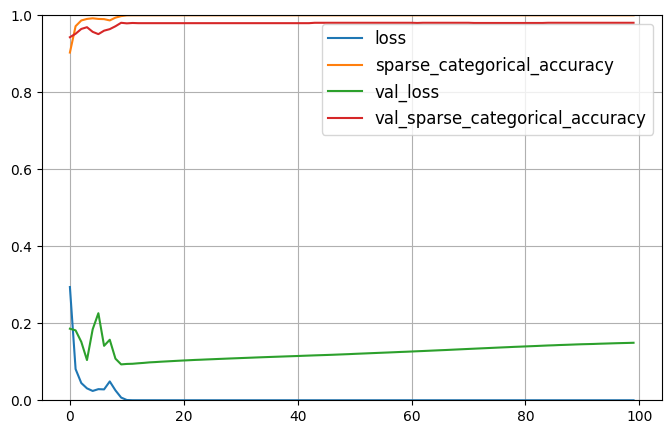

In [109]:
plot_metrics(history)

In [110]:
print_test_metrics(model, X_test, y_test, learning_rate)

63/63 [==============================] - 0s 2ms/step - loss: 0.1118 - sparse_categorical_accuracy: 0.9865

For learning Rate :  0.001
	 Reported Loss on Test set :  0.1118
	 Reported accuracy on Test set :  0.9865


# Using Learning rate as 0.00001 i.e. 1e-5

In [111]:
%%capture
learning_rate = 1e-5
model, history = train_neural_net("hq2_neural_net_LR1e-5", X_train, y_train, X_valid, y_valid, learning_rate, activation_functions)

INFO:tensorflow:Assets written to: hq2_neural_net_LR1e-5\assets


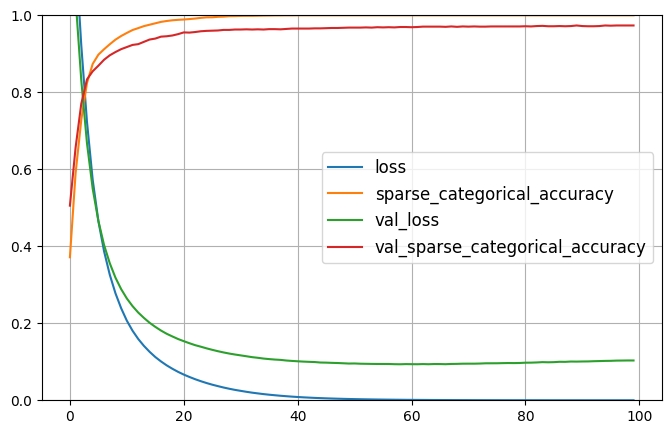

In [112]:
plot_metrics(history)

In [113]:
print_test_metrics(model, X_test, y_test, learning_rate)

63/63 [==============================] - 0s 2ms/step - loss: 0.0870 - sparse_categorical_accuracy: 0.9765

For learning Rate :  1e-05
	 Reported Loss on Test set :  0.087
	 Reported accuracy on Test set :  0.9765


### Using Learning rate as 0.01 i.e. 1e-2

In [114]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [115]:
%%capture
learning_rate = 1e-2
model, history = train_neural_net("hq2_neural_net_LR1e-2", X_train, y_train, X_valid, y_valid, learning_rate, activation_functions)

INFO:tensorflow:Assets written to: hq2_neural_net_LR1e-2\assets


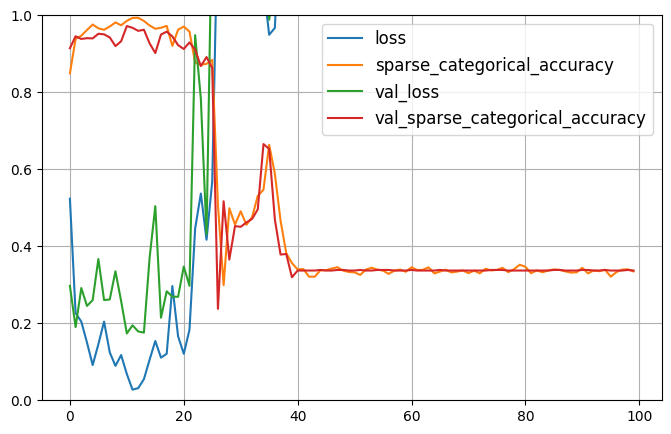

In [116]:
plot_metrics(history)

In [117]:
print_test_metrics(model, X_test, y_test, learning_rate)

63/63 [==============================] - 0s 2ms/step - loss: 1.3181 - sparse_categorical_accuracy: 0.3405

For learning Rate :  0.01
	 Reported Loss on Test set :  1.3181
	 Reported accuracy on Test set :  0.3405


### Question:

Run the network on the test portion of the dataset using best-performing learning rate and report loss and accuracy. [2 points] How many parameters does the network have? How many of those parameters are bias parameters?

##### The best performing learning rate is 0.001 i.e. 1e-3 with reported loss = 9.52% and accuracy 98.85%

The criteria used for selecting the best performing model for this example is to select model with minimal loss and highest accuracy

The model is trained under below architecture

In [118]:
model = tf.keras.Sequential([
tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
tf.keras.layers.Dense(500, activation=activation_functions["hidden_layer1"]),
tf.keras.layers.Dense(200, activation=activation_functions["hidden_layer2"]),
tf.keras.layers.Dense(50, activation=activation_functions["hidden_layer3"]),
tf.keras.layers.Dense(20, activation=activation_functions["hidden_layer4"]),
tf.keras.layers.Dense(5, activation=activation_functions["ouput_layer"])
])

In [119]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1024)             2049      
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 500)               512500    
                                                                 
 dense_6 (Dense)             (None, 200)               100200    
                                                                 
 dense_7 (Dense)             (None, 50)                10050     
                                                                 
 dense_8 (Dense)             (None, 20)                1020      
                                                                 
 dense_9 (Dense)             (None, 5)                 105       
                                                      

### Answers:

1. The total parameters available are 625,924, out of those the trainable parameters are 623,875 and non trainable parameters are 1569.

2. There are in total 500 bias parameters for hidden layer 1, 200 bias parameters for hidden layer 2, 50 bias parameters for hidden layer 3, 20 bias parameters for hidden layer 4 and 10 bias parameters for output layer, which makes in total 780 bias parameters.

### Question: 

Repeat everything from the previous step but make the hidden layers have linear activation functions. [5 points] Discuss how this impacts accuracy and why. [2 points]


### Using Learning rate as 0.001 i.e. 1e-3

In [120]:
linear_activation_functions = {'hidden_layer1': 'linear', 
                        'hidden_layer2': 'linear',
                        'hidden_layer3': 'linear', 
                        'hidden_layer4': 'linear',
                        'ouput_layer': 'softmax'}

In [121]:
%%capture
learning_rate = 1e-3
model, history = train_neural_net("hq2_neural_net_LR1e-3_linear", X_train, y_train, X_valid, y_valid, learning_rate, linear_activation_functions)

INFO:tensorflow:Assets written to: hq2_neural_net_LR1e-3_linear\assets


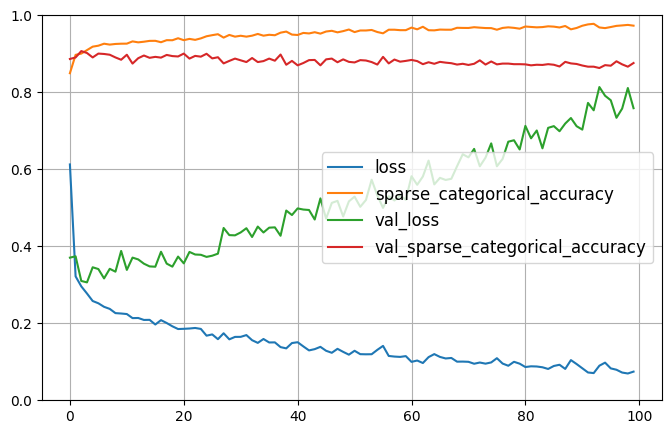

In [122]:
plot_metrics(history)

In [123]:
print_test_metrics(model, X_test, y_test, learning_rate)

63/63 [==============================] - 0s 4ms/step - loss: 0.6905 - sparse_categorical_accuracy: 0.8800

For learning Rate :  0.001
	 Reported Loss on Test set :  0.6905
	 Reported accuracy on Test set :  0.88


### Using Learning rate as 0.00001 i.e. 1e-5

In [124]:
%%capture
learning_rate = 1e-5
model, history = train_neural_net("hq2_neural_net_LR1e-5_linear", X_train, y_train, X_valid, y_valid, learning_rate, linear_activation_functions)

INFO:tensorflow:Assets written to: hq2_neural_net_LR1e-5_linear\assets


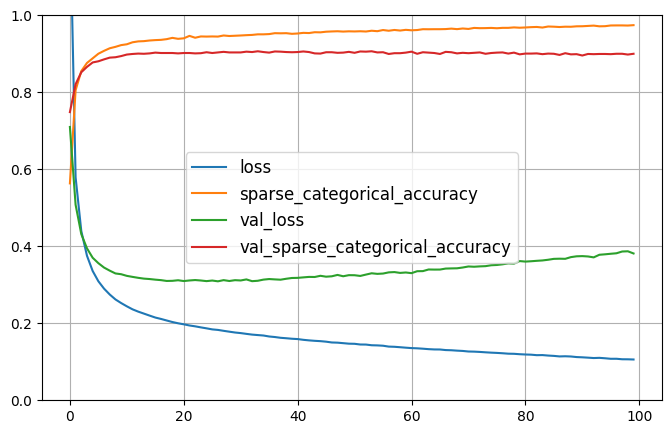

In [125]:
plot_metrics(history)

In [126]:
print_test_metrics(model, X_test, y_test, learning_rate)

63/63 [==============================] - 0s 2ms/step - loss: 0.3608 - sparse_categorical_accuracy: 0.8985

For learning Rate :  1e-05
	 Reported Loss on Test set :  0.3608
	 Reported accuracy on Test set :  0.8985


### Using Learning rate as 0.01 i.e. 1e-2

In [127]:
%%capture
learning_rate = 1e-2
model, history = train_neural_net("hq2_neural_net_LR1e-02_linear", X_train, y_train, X_valid, y_valid, learning_rate, linear_activation_functions)

INFO:tensorflow:Assets written to: hq2_neural_net_LR1e-02_linear\assets


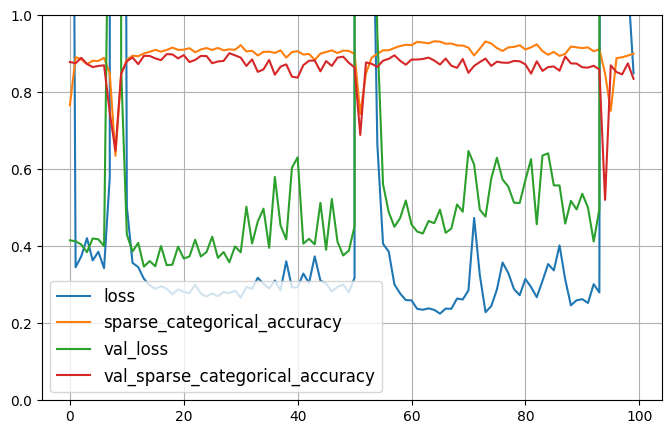

In [128]:
plot_metrics(history)

In [129]:
print_test_metrics(model, X_test, y_test, learning_rate)

63/63 [==============================] - 0s 2ms/step - loss: 1.6177 - sparse_categorical_accuracy: 0.8365

For learning Rate :  0.01
	 Reported Loss on Test set :  1.6177
	 Reported accuracy on Test set :  0.8365


##### The best performing learning rate is 0.00001 i.e. 1e-5 with reported loss = 3.57% and accuracy 88.9%

### Question:
Discuss how using linear activation function impacts accuracy and why. [2 points]

Here, we have used linear activation function. This can be done using setting activation function as `None` or `Linear`.

The linear activation function is set for the 2 hidden layers of the neural network. We can observe following things:

For Learning rate as 0.001 i.e. 1e-3 :

ReLU activation :
     Loss : 0.0952
	 accuracy : 0.9885
    
Linear Activation:
	 Loss : 0.7063
	 accuracy : 0.8805


For Learning rate as 0.00001 i.e. 1e-5 :

ReLU activation : 
	 Loss :  0.0997
	 accuracy : 0.974
    
Linear Activation:
	 Loss :  0.357
	 accuracy :  0.889


For Learning rate as 0.01 i.e. 1e-2 :

ReLU activation :
	 Loss : 1.3873
	 accuracy : 0.3575
    
Linear Activation:
	 Loss : 277.785
	 accuracy : 0.77


##### Observations : 

1. The linear model performs better for the 2 learning rates (1e-3 and 1e-5) than a model with ReLU activation. This might happen because of the neural network we have created is shallow.(contains only 4 hidden layers). If the network is deep enough, we might have been able to see some differences. 
2. Also, as our dataset is MNIST like, one of the possibility is that the model might be learned the linear combination of features.
3. One more possibility is that, the ReLU might have overfitted on the training data causing it to give huge loss on the test data.
4. Also, for learning rate 1e-2, the test loss has sky-rockated. This is because our model overfitted on the training data and thus caused errors on test set.
5. For linear activation function, for learning rate 1e-3, the accuracy is aobut 88% and loss is about 70%. i.e., loss is also high. 
6. Thus for this perticualr case we might choose learning rate as 1e-3 with relu activation function.

# Acknowledgements:

We would like to thank Prof. Zoran Tiganj for his guidance on the plotting scatterplot using principle components for different dimentionality reduction methodologies. Also, choosing subset of data. Also, we have worked according to his suggestion about following code on the github repository of Machine Learning Notebooks by A. Geron. Also, most of this code is somewhat replica of work done in question 1.

# References : 

[1] Geron, A. (2019). Hands-on machine learning with scikit-learn, keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly Media.

[2] Machine Learning Notebooks(8,9,10) on GitHub by A. Geron. https://github.com/ageron/handson-ml2 , https://github.com/ageron/handson-ml3

[2] API Reference. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/classes.html

[3] API Reference. (n.d.). Pandas. https://pandas.pydata.org/docs/user_guide/index.html

[4] API Reference. (n.d.). NumPy. https://numpy.org/doc/stable/user/index.html#user

[5] How to save dictionaries : https://stackoverflow.com/questions/40219946/python-save-dictionaries-through-numpy-save